Predykcja Ceny Mieszkań
Ładowanie danych:

In [87]:
import pandas as pd

# Wczytaj dane
df = pd.read_csv('data/housing_data.csv')

Sprwdź dane:
Użyj funkcji df.info() i df.describe(), aby zweryfikować, czy są jakieś brakujące wartości i jak wygląda
rozkład wartości.
Podziel dane na zbiory:

In [88]:
print(df.info())
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1000 non-null   int64  
 1   Bedrooms  1000 non-null   int64  
 2   Age       1000 non-null   int64  
 3   Price     1000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 31.4 KB
None
Area        0
Bedrooms    0
Age         0
Price       0
dtype: int64


,Area,Bedrooms,Age,Price
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,110.299000,2.448000,14.207000,115705.062275
std,51.792645,1.107485,8.727561,53981.451997
min,20.000000,1.000000,0.000000,0.000000
25%,66.000000,1.000000,7.000000,69535.110662
50%,113.000000,2.000000,14.000000,117740.830330
75%,155.000000,3.000000,22.000000,159423.960145
max,199.000000,4.000000,29.000000,229235.109704


In [89]:
from sklearn.model_selection import train_test_split
# Definiowanie X i y
X = df[['Area', 'Bedrooms', 'Age']]
y = df['Price']
# Podział na zbiory: treningowy i testowy
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60/40
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20/20

Trenuj model:
Użyj modelu do trenowania na zbiorze treningowym oraz walidacyjnym.

In [90]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=5,
    validation_split=0.2
)


Epoch 1/50


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16171525120.0000 - mae: 115794.6641 - val_loss: 15426100224.0000 - val_mae: 112508.7891
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15556613120.0000 - mae: 113536.8906 - val_loss: 14278180864.0000 - val_mae: 108150.5391
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13349365760.0000 - mae: 104953.2812 - val_loss: 11173151744.0000 - val_mae: 95330.3359
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9069423616.0000 - mae: 85697.7656 - val_loss: 6374415872.0000 - val_mae: 71124.0000
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4191594240.0000 - mae: 56734.8945 - val_loss: 2332905472.0000 - val_mae: 41208.6016
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1201639296.0000 - mae: 28361.2266 - val_loss: 616977536.0000 - val_mae: 19840.0859
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 365859776.0000 - mae: 15337.2275 - val_loss: 322442784.0000 - val_mae: 14671.0049
Epoch 8/5

Zadanie: Ustal różne wartości epok (np. 10, 20, 50) i poeksperymentuj z wielkościami partii (batch
size np. 16, 32, 64). Dokonaj porównania modeli
Przetestuj różne rodzaje funkcji aktywacji
Ocena modelu na zbiorze testowym
Zaprezentuj wyniki na wykresach

Test: 10ep | bs=16 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 89652
Test: 10ep | bs=16 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118357
Test: 10ep | bs=16 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118366
Test: 10ep | bs=32 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 115467
Test: 10ep | bs=32 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118366
Test: 10ep | bs=32 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118376
Test: 10ep | bs=64 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 117988
Test: 10ep | bs=64 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118372
Test: 10ep | bs=64 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118379
Test: 20ep | bs=16 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 18058
Test: 20ep | bs=16 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118338
Test: 20ep | bs=16 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118357
Test: 20ep | bs=32 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 100314
Test: 20ep | bs=32 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118357
Test: 20ep | bs=32 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118369
Test: 20ep | bs=64 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 115739
Test: 20ep | bs=64 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118366
Test: 20ep | bs=64 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118377
Test: 50ep | bs=16 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 10840
Test: 50ep | bs=16 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118281
Test: 50ep | bs=16 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118331
Test: 50ep | bs=32 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 12560
Test: 50ep | bs=32 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118327
Test: 50ep | bs=32 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118347
Test: 50ep | bs=64 | relu ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 64053
Test: 50ep | bs=64 | tanh ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118350
Test: 50ep | bs=64 | sigmoid ... 

C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ MAE: 118368

PODSUMOWANIE WSZYSTKICH TESTÓW:
    Epoki  Batch_size Aktywacja     Test_Loss  Test_MAE
0      10          16      relu  9.967799e+09   89652.0
1      10          16      tanh  1.706635e+10  118357.0
2      10          16   sigmoid  1.706858e+10  118366.0
3      10          32      relu  1.626380e+10  115467.0
4      10          32      tanh  1.706867e+10  118366.0
5      10          32   sigmoid  1.707093e+10  118376.0
6      10          64      relu  1.696065e+10  117988.0
7      10          64      tanh  1.707000e+10  118372.0
8      10          64   sigmoid  1.707163e+10  118379.0
9      20          16      relu  5.307456e+08   18058.0
10     20          16      tanh  1.706191e+10  118338.0
11     20          16   sigmoid  1.706638e+10  118357.0
12     20          32      relu  1.238455e+10  100314.0
13     20          32      tanh  1.706639e+10  118357.0
14     20          32   sigmoid  1.706938e+10  118369.0
15     20          64      relu  1.633917e+10  115739.0
1

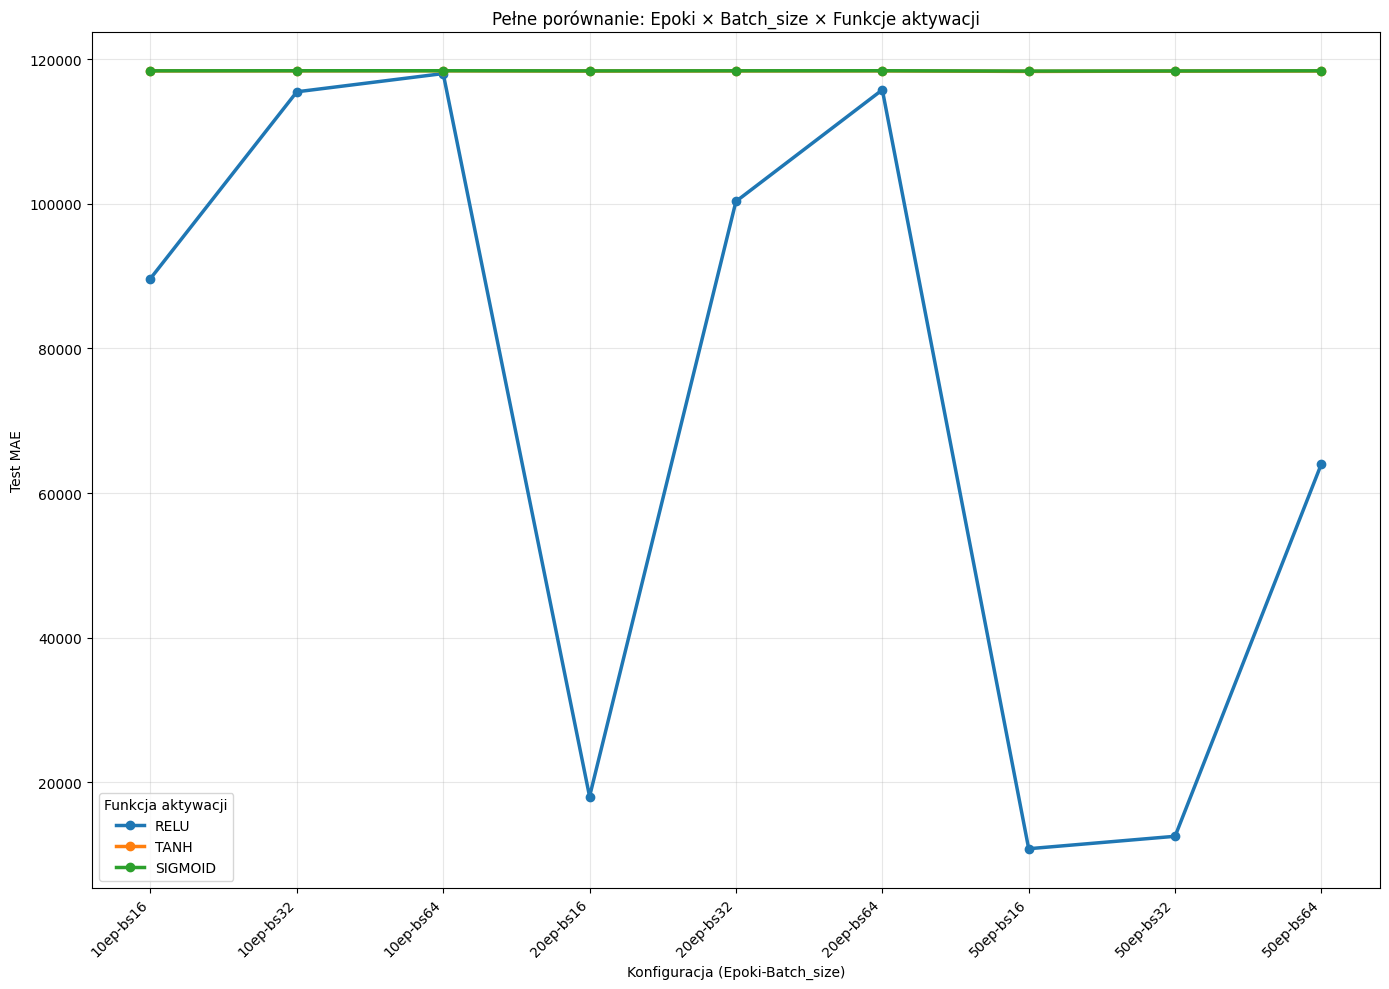

In [91]:
from matplotlib import pyplot as plt

epochos = [10, 20, 50]
batch_sizes = [16, 32, 64]
activations = ['relu', 'tanh', 'sigmoid']
results = []


for epochs in epochos:
    for batch_size in batch_sizes:
        for activation in activations:
            print(f"Test: {epochs}ep | bs={batch_size} | {activation}", end=" ... ")

            model = keras.Sequential([
                layers.Dense(64, activation=activation, input_shape=(X_train.shape[1],)),
                layers.Dense(64, activation=activation),
                layers.Dense(1)
            ])

            model.compile(
                optimizer='adam',
                loss='mean_squared_error',
                metrics=['mae']
            )

            history = model.fit(
                X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_split=0.2,
                verbose=0
            )

            test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
            results.append([epochs, batch_size, activation, test_loss, test_mae])

            print(f"sMAE: {test_mae:.0f}")




df_results = pd.DataFrame(results,
                         columns=['Epoki', 'Batch_size', 'Aktywacja', 'Test_Loss', 'Test_MAE'])
print("\nPODSUMOWANIE WSZYSTKICH TESTÓW:")
print(df_results.round(0))


best_result = df_results.loc[df_results['Test_MAE'].idxmin()]
print(f"\nNAJLEPSZY WYNIK:")
print(f"   Epoki: {best_result['Epoki']}")
print(f"   Batch: {best_result['Batch_size']}")
print(f"   Aktywacja: {best_result['Aktywacja']}")
print(f"   Test MAE: {best_result['Test_MAE']:.0f}")

plt.figure(figsize=(14, 10))

for activation in activations:
    subset = df_results[df_results['Aktywacja'] == activation]
    labels = [f"{int(e)}ep-bs{int(b)}" for e, b in zip(subset['Epoki'], subset['Batch_size'])]
    plt.plot(labels, subset['Test_MAE'], marker='o', label=f'{activation.upper()}', linewidth=2.5)

plt.xlabel("Konfiguracja (Epoki-Batch_size)")
plt.ylabel("Test MAE")
plt.title("Pełne porównanie: Epoki × Batch_size × Funkcje aktywacji")
plt.legend(title="Funkcja aktywacji")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Titanic Dataset

### Przygotowanie Danych

In [92]:
# Wczytanie danych
titanic = pd.read_csv('data/Titanic-Dataset.csv')

# Eksploracja
print(titanic.head())
print(titanic.info())
print(titanic.describe())
print(titanic.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### Czyszczenie i Preprocessing Danych

In [93]:
from sklearn.preprocessing import LabelEncoder

# Usunięcie niepotrzebnych kolumn
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Obsługa brakujących wartości
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

# Kodowanie zmiennych kategorycznych
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
le_embarked = LabelEncoder()
titanic['Embarked'] = le_embarked.fit_transform(titanic['Embarked'])

# Definicja X i y (Survived jako zmienna docelowa)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

C:\Users\megaz\AppData\Local\Temp\ipykernel_12684\1239550599.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
C:\Users\megaz\AppData\Local\Temp\ipykernel_12684\1239550599.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

### Podział Danych, Skalowanie

In [94]:
from sklearn.preprocessing import StandardScaler

# 2. Podział na zbiory: 60% train, 20% val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# 3. Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Eksperymenty z modelami - klasyfikacja

Test: 10ep bs16 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7933
Test: 10ep bs16 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.8045
Test: 10ep bs16 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7430
Test: 10ep bs32 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
  Accuracy: 0.8101
Test: 10ep bs32 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
  Accuracy: 0.7989
Test: 10ep bs32 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7486
Test: 10ep bs64 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7933
Test: 10ep bs64 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7765
Test: 10ep bs64 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.6648
Test: 20ep bs16 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.8045
Test: 20ep bs16 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7989
Test: 20ep bs16 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
  Accuracy: 0.7821
Test: 20ep bs32 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.8212
Test: 20ep bs32 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.8045
Test: 20ep bs32 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7765
Test: 20ep bs64 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.8101
Test: 20ep bs64 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7877
Test: 20ep bs64 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7430
Test: 50ep bs16 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.8045
Test: 50ep bs16 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
  Accuracy: 0.7877
Test: 50ep bs16 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7933
Test: 50ep bs32 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
  Accuracy: 0.8101
Test: 50ep bs32 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7989
Test: 50ep bs32 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7933
Test: 50ep bs64 relu


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
  Accuracy: 0.8101
Test: 50ep bs64 tanh


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.8101
Test: 50ep bs64 sigmoid


C:\Users\megaz\PycharmProjects\Lab - TensorFlow\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
  Accuracy: 0.7877

PODSUMOWANIE WSZYSTKICH TESTÓW:
    Epoki  Batch_size Aktywacja  Test_Loss  Test_Accuracy  Test_Precision
0      10          16      relu     0.4524         0.7933          0.7933
1      10          16      tanh     0.4555         0.8045          0.8045
2      10          16   sigmoid     0.5138         0.7430          0.7430
3      10          32      relu     0.4412         0.8101          0.8101
4      10          32      tanh     0.4585         0.7989          0.7989
5      10          32   sigmoid     0.5442         0.7486          0.7486
6      10          64      relu     0.4696         0.7933          0.7933
7      10          64      tanh     0.4635         0.7765          0.7765
8      10          64   sigmoid     0.6029         0.6648          0.6648
9      20          16      relu     0.4488         0.8045          0.8045
10     20          16      tanh     0.4579         0.7989          0.7989
11     20          16 

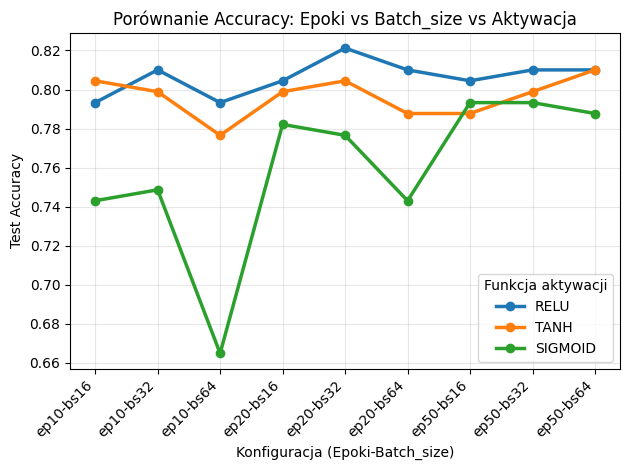

In [95]:
from sklearn.metrics import accuracy_score

# 4. Eksperymenty z modelami - klasyfikacja binarna
epochs_list = [10, 20, 50]
batch_sizes = [16, 32, 64]
activations = ['relu', 'tanh', 'sigmoid']

results = []

for epochs in epochs_list:
    for batch_size in batch_sizes:
        for activation in activations:
            print(f"Test: {epochs}ep bs{batch_size} {activation}")

            # Model klasyfikacyjny (sigmoid na wyjściu)
            model = keras.Sequential([
                layers.Dense(64, activation=activation, input_shape=(X_train_scaled.shape[1],)),
                layers.Dropout(0.3),
                layers.Dense(64, activation=activation),
                layers.Dropout(0.3),
                layers.Dense(1, activation='sigmoid')  # Binary classification
            ])

            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',  # Dla klasyfikacji
                metrics=['accuracy']
            )

            # Trenowanie z walidacją
            history = model.fit(
                X_train_scaled, y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(X_val_scaled, y_val),
                verbose=0
            )

            # Ewaluacja na zbiorze testowym
            test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
            y_pred_proba = model.predict(X_test_scaled).flatten()
            y_pred = (y_pred_proba > 0.5).astype(int)

            results.append({
                'Epoki': epochs,
                'Batch_size': batch_size,
                'Aktywacja': activation,
                'Test_Loss': test_loss,
                'Test_Accuracy': test_acc,
                'Test_Precision': accuracy_score(y_test, y_pred)  # Dokładność
            })

            print(f"  Accuracy: {test_acc:.4f}")

# 5. Podsumowanie wyników
df_results = pd.DataFrame(results)
print("\nPODSUMOWANIE WSZYSTKICH TESTÓW:")
print(df_results.round(4))

# Najlepszy wynik
best_result = df_results.loc[df_results['Test_Accuracy'].idxmax()]
print(f"\nNAJLEPSZY WYNIK:")
print(f"Epoki: {best_result['Epoki']}")
print(f"Batch: {best_result['Batch_size']}")
print(f"Aktywacja: {best_result['Aktywacja']}")
print(f"Test Accuracy: {best_result['Test_Accuracy']:.4f}")

# Wykres  Wszystkie kombinacje
for activation in activations:
    subset = df_results[df_results['Aktywacja'] == activation]
    labels = [f"ep{int(e)}-bs{int(b)}" for e, b in zip(subset['Epoki'], subset['Batch_size'])]
    plt.plot(labels, subset['Test_Accuracy'], marker='o', linewidth=2.5, label=f"{activation.upper()}")
plt.xlabel("Konfiguracja (Epoki-Batch_size)")
plt.ylabel("Test Accuracy")
plt.title("Porównanie Accuracy: Epoki vs Batch_size vs Aktywacja")
plt.legend(title="Funkcja aktywacji")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
